In [3]:
#|default_exp app

## Gradio Elephants

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

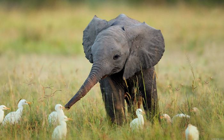

In [5]:
im = PILImage.create('baby_african_elephant.jpg')
im.thumbnail((224,224))
im

In [6]:
#|export
learn = load_learner('model.pkl')

In [7]:
learn.predict(im)

('african', tensor(0), tensor([0.9955, 0.0034, 0.0011]))

In [8]:
#|export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [9]:
classify_image(im)

{'african': 0.995481014251709,
 'asian': 0.0033741977531462908,
 'mammoth': 0.0011448308359831572}

In [10]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['baby_african_elephant.jpg', 'baby_asian_elephant.jpg', 'mammoth_plushie.jpg']

/tmp/ipykernel_90495/3075341471.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192, 192))
/tmp/ipykernel_90495/3075341471.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192, 192))
/tmp/ipykernel_90495/3075341471.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
/tmp/ipykernel_90495/3075341471.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


In [16]:
#|export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [17]:
import nbdev

In [21]:
nbdev.export.nb_export('elephants.ipynb', './app')
print('Export successful')

Export successful
